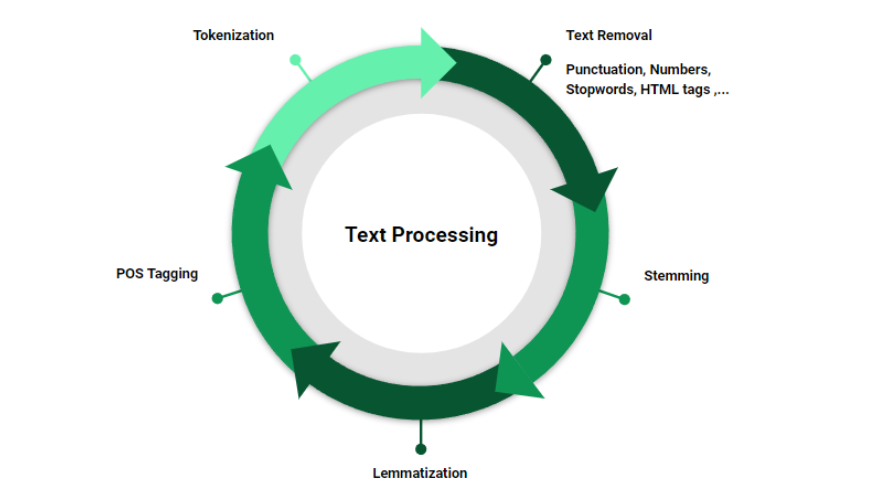

# Text Preprocessing for both ML and DL
- In this notebook we can tell all the text preprocessing step that we can use in both machine leaning and deep learning.
- **What you will learn form this note-book.**
    - **Text Preprocessing for machine learning**
        - Convert text to lower case.
        - Text to tokens
        - Remove URL or tags.
        - Remove Stop Words if necessray
        - Convert text to `vector or vectors` for traning.
    - **Text Preprocessing for Deep Learning learning**
        - For text preprocessing we will see `openai tokenization` **Tiktoken**
        - We will see `hugging face` **Tokenization**
        - We will also see how we can build custom txt dataset using `pytorch` so that we can use them for model training

In [1]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Load data
- we will use the `Cnn Daily Mail Dataset`

In [2]:
!kaggle datasets download -d gowrishankarp/newspaper-text-summarization-cnn-dailymail

Dataset URL: https://www.kaggle.com/datasets/gowrishankarp/newspaper-text-summarization-cnn-dailymail
License(s): CC0-1.0
 99% 497M/503M [00:05<00:00, 70.3MB/s]
100% 503M/503M [00:05<00:00, 94.5MB/s]


In [3]:
!unzip  /content/newspaper-text-summarization-cnn-dailymail.zip

Archive:  /content/newspaper-text-summarization-cnn-dailymail.zip
  inflating: cnn_dailymail/test.csv  
  inflating: cnn_dailymail/train.csv  


# Data Preprocessing

In [4]:
df = pd.read_csv("/content/cnn_dailymail/train.csv")
df.head(2)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...



# Observation
- we cna get the only 1000 records

# Normal Life

# Data Preprocessing
- Convert the text into tokens
- Lower case
- Remove Pouncation
- Steming or lemitizatinon
- Embeddings

In [5]:
df = df.iloc[:1000,1:]

In [6]:
df.head(2)

,article,highlights
0,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...


# Impoer necessrry packages

In [7]:
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.stem import  PorterStemmer
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Data Preprocessing Function
- we will make a dtaa preprocessing fun so that we can use them for text cleaning

In [9]:
def preprocess_text(text):
    # Lower case
    text = text.lower()

    # Text to tokens
    # tokens = word_tokenize(text)
    tokens = sent_tokenize(text)

    stemer = PorterStemmer()
    clean_text = []
    for token in tokens:
        for word in token.split():
            word = stemer.stem(word)
            # print(word)
            clean_text.append(word)
    return " ".join(clean_text)

In [10]:
# Test the fun
preprocess_text(df.iloc[0,0])

"by . associ press . published: . 14:11 est, 25 octob 2013 . | . updated: . 15:36 est, 25 octob 2013 . the bishop of the fargo cathol dioces in north dakota ha expos potenti hundr of church member in fargo, grand fork and jamestown to the hepat a viru in late septemb and earli october. the state health depart ha issu an advisori of exposur for anyon who attend five church and took communion. bishop john folda (pictured) of the fargo cathol dioces in north dakota ha expos potenti hundr of church member in fargo, grand fork and jamestown to the hepat a . state immun program manag molli howel say the risk is low, but offici feel it' import to alert peopl to the possibl exposure. the dioces announc on monday that bishop john folda is take time off after be diagnos with hepat a. the dioces say he contract the infect through contamin food while attend a confer for newli ordain bishop in itali last month. symptom of hepat a includ fever, tiredness, loss of appetite, nausea and abdomin discomf

In [11]:
# Test the fun
preprocess_text(df.iloc[0,1])

'bishop john folda, of north dakota, is take time off after be diagnos . he contract the infect through contamin food in itali . church member in fargo, grand fork and jamestown could have been expos .'

In [12]:
# Apply the function
%%time
df['article'] = df['article'].apply(preprocess_text)
df['highlights'] = df['highlights'].apply(preprocess_text)

CPU times: user 15.9 s, sys: 43.6 ms, total: 15.9 s
Wall time: 16.1 s


# Observation
- We can't remove the stopword b/c context of the meaning is important for text summerization

In [13]:
df['article'][0]

"by . associ press . published: . 14:11 est, 25 octob 2013 . | . updated: . 15:36 est, 25 octob 2013 . the bishop of the fargo cathol dioces in north dakota ha expos potenti hundr of church member in fargo, grand fork and jamestown to the hepat a viru in late septemb and earli october. the state health depart ha issu an advisori of exposur for anyon who attend five church and took communion. bishop john folda (pictured) of the fargo cathol dioces in north dakota ha expos potenti hundr of church member in fargo, grand fork and jamestown to the hepat a . state immun program manag molli howel say the risk is low, but offici feel it' import to alert peopl to the possibl exposure. the dioces announc on monday that bishop john folda is take time off after be diagnos with hepat a. the dioces say he contract the infect through contamin food while attend a confer for newli ordain bishop in itali last month. symptom of hepat a includ fever, tiredness, loss of appetite, nausea and abdomin discomf

In [14]:
df['highlights'][0]

'bishop john folda, of north dakota, is take time off after be diagnos . he contract the infect through contamin food in itali . church member in fargo, grand fork and jamestown could have been expos .'

# Observation
- Now we can clean the text now we can conevcrt the text into embeddings

# TFIDF
- we will use the `TF-IDF` for text encoding
- **Note** we will also use the `Count Vectorizer` keep in mind.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
artile_courpus = df['article'].tolist()
summary_courpus = df['highlights'].tolist()

In [17]:
vector = TfidfVectorizer()

# article embedding
article_embedding = vector.fit_transform(artile_courpus).toarray()

# summary embeddings
summary_embedding = vector.fit_transform(summary_courpus ).toarray()

In [18]:
# article embedding
article_embedding

# summary embeddings
summary_embedding

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.21594621, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [19]:
# Now make dic
dic = {
    "Article" : artile_courpus,
    "Article_Embedding" : article_embedding,

    "Summary" : artile_courpus,
    "summary_embedding" : summary_embedding
}

In [20]:
dic['Article'][0]

"by . associ press . published: . 14:11 est, 25 octob 2013 . | . updated: . 15:36 est, 25 octob 2013 . the bishop of the fargo cathol dioces in north dakota ha expos potenti hundr of church member in fargo, grand fork and jamestown to the hepat a viru in late septemb and earli october. the state health depart ha issu an advisori of exposur for anyon who attend five church and took communion. bishop john folda (pictured) of the fargo cathol dioces in north dakota ha expos potenti hundr of church member in fargo, grand fork and jamestown to the hepat a . state immun program manag molli howel say the risk is low, but offici feel it' import to alert peopl to the possibl exposure. the dioces announc on monday that bishop john folda is take time off after be diagnos with hepat a. the dioces say he contract the infect through contamin food while attend a confer for newli ordain bishop in itali last month. symptom of hepat a includ fever, tiredness, loss of appetite, nausea and abdomin discomf

In [21]:
dic['Article_Embedding'][0]

array([0., 0., 0., ..., 0., 0., 0.])

# Legend Life
- In this we can use the advance tokenization technique like `tok token` and `hugging face tokenization` ect

# Tik-Token Embedding

In [22]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.0 MB/s eta 0:00:00


In [23]:
import tiktoken

In [24]:
# Initilize the encoding
encoding = tiktoken.get_encoding("cl100k_base")

In [25]:
def process_text(text):
    # Convert the text to lower case
    text = text.lower()
    # convert the text into token
    encoding = tiktoken.get_encoding("cl100k_base")

    # Encode text into tokens
    tokens = encoding.encode(text)

    return tokens

In [26]:
# Test the fun
tokens = process_text(df['article'][0])

In [27]:
print("token: ",tokens)

token:  [1729, 662, 4189, 3577, 662, 4756, 25, 662, 220, 975, 25, 806, 1826, 11, 220, 914, 18998, 677, 220, 679, 18, 662, 765, 662, 6177, 25, 662, 220, 868, 25, 1927, 1826, 11, 220, 914, 18998, 677, 220, 679, 18, 662, 279, 54306, 315, 279, 282, 12359, 31747, 337, 1891, 511, 288, 304, 10411, 98153, 6217, 6520, 46956, 3419, 23202, 305, 1263, 81, 315, 8993, 4562, 304, 282, 12359, 11, 6800, 23243, 323, 503, 373, 44058, 311, 279, 58259, 264, 9043, 84, 304, 3389, 35429, 9034, 323, 2487, 747, 18998, 6048, 13, 279, 1614, 2890, 11776, 6520, 53066, 459, 9819, 13915, 315, 46956, 324, 369, 904, 263, 889, 9604, 4330, 8993, 323, 3952, 94132, 13, 54306, 40742, 11816, 64, 320, 69389, 8, 315, 279, 282, 12359, 31747, 337, 1891, 511, 288, 304, 10411, 98153, 6217, 6520, 46956, 3419, 23202, 305, 1263, 81, 315, 8993, 4562, 304, 282, 12359, 11, 6800, 23243, 323, 503, 373, 44058, 311, 279, 58259, 264, 662, 1614, 33119, 2068, 893, 351, 22337, 747, 1268, 301, 2019, 279, 5326, 374, 3428, 11, 719, 2856, 72, 2733,

In [28]:
# Decode the token
decode_text = encoding.decode(tokens)
decode_text

"by . associ press . published: . 14:11 est, 25 octob 2013 . | . updated: . 15:36 est, 25 octob 2013 . the bishop of the fargo cathol dioces in north dakota ha expos potenti hundr of church member in fargo, grand fork and jamestown to the hepat a viru in late septemb and earli october. the state health depart ha issu an advisori of exposur for anyon who attend five church and took communion. bishop john folda (pictured) of the fargo cathol dioces in north dakota ha expos potenti hundr of church member in fargo, grand fork and jamestown to the hepat a . state immun program manag molli howel say the risk is low, but offici feel it' import to alert peopl to the possibl exposure. the dioces announc on monday that bishop john folda is take time off after be diagnos with hepat a. the dioces say he contract the infect through contamin food while attend a confer for newli ordain bishop in itali last month. symptom of hepat a includ fever, tiredness, loss of appetite, nausea and abdomin discomf

# Hugging Face Tokenization
- In this we can use `hugging face tokenizer`

In [30]:
# model = T5ForConditionalGeneration.from_pretrained('t5-base')

In [31]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [32]:
# Load the T5 tokenizer and model
tokenizer = T5Tokenizer.from_pretrained('t5-base')

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


# Test the tokenizer

In [33]:
# ipput ids
input_ids=tokenizer(df['article'][0])

In [34]:
tokenizer.decode(input_ids['input_ids'])

"by . associ press . published: . 14:11 est, 25 octob 2013 . | . updated: . 15:36 est, 25 octob 2013 . the bishop of the fargo cathol dioces in north dakota ha expos potenti hundr of church member in fargo, grand fork and jamestown to the hepat a viru in late septemb and earli october. the state health depart ha issu an advisori of exposur for anyon who attend five church and took communion. bishop john folda (pictured) of the fargo cathol dioces in north dakota ha expos potenti hundr of church member in fargo, grand fork and jamestown to the hepat a . state immun program manag molli howel say the risk is low, but offici feel it' import to alert peopl to the possibl exposure. the dioces announc on monday that bishop john folda is take time off after be diagnos with hepat a. the dioces say he contract the infect through contamin food while attend a confer for newli ordain bishop in itali last month. symptom of hepat a includ fever, tiredness, loss of appetite, nausea and abdomin discomf

In [35]:
# fun for text encoding
def process_text(data):
    artilce = data['article']
    summary = data['highlights']

    article_encoding = tokenizer(artilce, return_tensors="pt",padding=True, truncation=True)
    summary_encoding = tokenizer(summary, return_tensors="pt",padding=True, truncation=True)

    return {
        "input_ids": article_encoding["input_ids"].squeeze(),
        "attention_mask":article_encoding['attention_mask'].squeeze(),
        "labels": summary_encoding["input_ids"].squeeze()
    }

In [36]:
process_text(df.iloc[0])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


{'input_ids': tensor([   57,     3,     5,    38,  5444,  2785,     3,     5,  1790,    10,
             3,     5,   968,    10,  2596,   259,     6,   944,     3,    32,
            75,   235,   115,  2038,     3,     5,  1820,     3,     5,  3250,
            10,     3,     5,   627,    10,  3420,   259,     6,   944,     3,
            32,    75,   235,   115,  2038,     3,     5,     8, 25214,    13,
             8,   623,   839,  1712,  2831,  1227,    32,  2319,    16,  3457,
           836, 15414,     9,  4244,     3, 19300,     7,   815,   295,    23,
             3,   107,  1106,    52,    13,  2078,  1144,    16,   623,   839,
             6,  1907,    21,   157,    11,  7620,    15,     7,  3540,    12,
             8,     3,    88,  4665,     3,     9,     3,  5771,    76,    16,
          1480, 16022,    15,    51,   115,    11,     3,  2741,    40,    23,
             3,    32,    75,   235,  1152,     5,     8,   538,   533, 15407,
          4244,    19,     7,    76,   

# Hugging Face Dataset Format

# If it necessrary
- we can conveert the data into hugging face dataset.
- **Note** we will convert the data into hugging face data if we can use the `Hugging Face` **trainer Obj** for training the model.
- If we can't use the `Hugging Face` **trainer Obj** it is not necessary.

In [38]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [40]:
from datasets import Dataset

# Create a Hugging Face Dataset from the pandas DataFrame
huggingface_dataset = Dataset.from_pandas(df)

In [41]:
huggingface_dataset

Dataset({
    features: ['article', 'highlights'],
    num_rows: 1000
})

In [42]:
# Apply the processing function to the dataset
huggingface_dataset = huggingface_dataset.map(process_text)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [43]:
# Now you have a Hugging Face dataset ready for use with transformers
huggingface_dataset

Dataset({
    features: ['article', 'highlights', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1000
})

# observation
- Now we can use the transformer tokenizer for text encoding
- Now we can see how we can use the pytorch dataset to make a custom dataset so that we can use them for training

# Pytoch Custom Dataset
**Note**
- For building a Custom data we will use the `original` pandas dataframe not `hugging face dataset`

In [44]:
from torch.utils.data import Dataset, DataLoader

In [83]:
class CustomData(Dataset):
    def __init__(self,data, tokenizer):
        self.data = data.reset_index(drop=True)
        self.tokenizer= tokenizer
        self.article = data['article']
        self.summary =  data['highlights']

    def __len__(self):
        return len(self.data)

    def __getitem__(self,idx):
        # Get the article and summary of data
        article = self.article[idx]
        summary = self.summary[idx]

        # encode the text and summary
        article_embedding = self.tokenizer(article, padding='max_length',truncation = True, return_tensors="pt",max_length=512)

        # Summary embedding
        summary_embedding = self.tokenizer(summary, padding='max_length',truncation = True, return_tensors="pt",max_length=512)

        return {
            "input_ids": article_embedding["input_ids"].squeeze(),
            "attention_mask":article_embedding['attention_mask'].squeeze(),
            "labels": summary_embedding["input_ids"].squeeze()
        }


In [84]:
# make a dataset
dataset = CustomData(df,tokenizer)

In [85]:
dataset

In [86]:
# Make a dataloader
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

In [87]:
dataloader

In [88]:
for idx, batch in enumerate(dataloader):
    print(batch)
    break

{'input_ids': tensor([[ 6179,  6029,    41,  ...,  5314,  6873,     1],
        [   57,     3,     5,  ...,   528,     9,     1],
        [   57,     3,     5,  ...,     6, 15649,     1],
        ...,
        [   57,     3,     5,  ...,     9,    20,     1],
        [    3,     9,     3,  ...,     3,     5,     1],
        [   41,    75,    29,  ...,  1219,   158,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'labels': tensor([[    8,     3,     9,  ...,     0,     0,     0],
        [    3, 13585,   122,  ...,     0,     0,     0],
        [    3,     7, 10405,  ...,     0,     0,     0],
        ...,
        [   46,    15,    40,  ...,     0,     0,     0],
        [  836,  6961,    90,  ...,     0,     0,     0],
        [ 2278,     9,    15,  ...,     0,     0,     0]])}


# Observation
- We can make a custom data and we can directly use them for **model training**.